# Feature Engineering

앞의 Linear Regression 에서는 길이 특성 하나만 사용했는데, 특성이 높이와 두께도 있다면, 이 모든 데이터를 이용하는 것이 좋을 것이다.

이처럼 여러 개의 특성을 사용한 선형 회귀를 **다중 회귀**라고 한다. 그리고 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업을 **특성 공학(Feature Engineering)** 이라고 부른다.

### 데이터 준비

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 데이터프레임을 만듦
df = pd.read_csv('https://bit.ly/perch_csv')
# 만든 데이터프레임을 넘파이 배열로 바꾼다.
perch_full = df.to_numpy()

# 타깃 데이터는 동일함
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )


# 훈련 셋과 테스트 셋으로 나눈다.
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

### 변환기(Transformer)

사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공한다.

In [2]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

### 다중 회귀 모델 훈련하기

다중 회귀 모델을 훈련하는 것은 선형 회귀 모델을 훈련하는 것과 같다. 다만 여러 개의 특성을 사용하여 선형 회귀를 수행하는 것뿐이다. 

In [3]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594134


아주 높은 점수가 나왔다. 농어의 길이뿐만 아니라 높이와 두께를 모두 사용했고 각 특성을 제곱하거나 서로 곱해서 다항 특성을 더 추가했다. 

**특성이 늘어나면 선형 회귀의 능력은 매우 강하다는 것을 알 수 있다.**

> 특성을 더 많이 추가하면 어떨까? 3제곱, 4제곱 또는 5제곱 항을 넣는 것이다.

In [4]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)

(42, 55)


만들어진 특성의 개수가 무려 55개나 된다. 이 데이터를 사용해 선형 회귀 모델을 다시 훈련시켜 보자.

In [5]:
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999991097
-144.40579242684848


특성의 개수를 크게 늘리면 선형 모델은 아주 강력해진다. 훈련 셋에 대해 거의 완벽하게 학습할 수 있다. 하지만 이런 모델은 훈련 셋에 너무 과대적합되므로 테스트 셋에서는 형편없는 점수를 만든다.

> 이런 경우 어떻게 문제를 해결할 수 있을까?

# 규제(Regularization)

규제는 머신러닝 모델이 훈련 셋을 너무 과도하게 학습하지 못하도록 훼방하는 것을 말한다. 

즉 모델이 훈련 셋에 과대적합 되지 않도록 만드는 것이다. 선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 일이다.

### 스케일 정규화

In [6]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
# PolynomialFeatures 클래스로 만든 train_poly 를 사용해 객체 훈련
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

선형 회귀 모델에 규제를 추가한 모델을 릿지(Ridge) 와 라쏘(Lasso) 라고 부른다. 두 모델은 규제를 가하는 방법이 다르다. 
- 릿지는 계수를 제곱한 값을 기준으로 규제를 적용하고, 
- 라쏘는 계수의 절댓값을 기준으로 규제를 적용한다.

## 릿지 회귀(Ridge Regression)

In [7]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615397


테스트 셋 점수가 정상으로 돌아왔다. 확실히 많은 특성을 사용했음에도 불구하고 훈련 셋에 너무 과대적합되지 않아 테스트 셋에서도 좋은 성능을 내고 있다.

릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절할 수 있다. 모델 객체를 만들 때 **alpha 매개변수로 규제의 강도를 조절**한다.
- alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도한다. 
- alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 크다.

In [8]:
import matplotlib.pyplot as plt

train_scores = []
test_scores = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    # 릿지 모델을 만든다.
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련한다.
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장한다.
    train_scores.append(ridge.score(train_scaled, train_target))
    test_scores.append(ridge.score(test_scaled, test_target))

그래프를 그리기 전에, alpha 값을 0.001 부터 10배씩 늘렸기 때문에 이대로 그래프를 그리면 그래프 왼쪽이 너무 촘촘해진다. 

alpha_list 에 있는 6개의 값을 동일한 간격으로 나타내기 위해 로그 함수로 바꾸어 지수로 표현하겠다. 즉 0.001 은 -3, 0.01 은 -2가 되는 식이다.

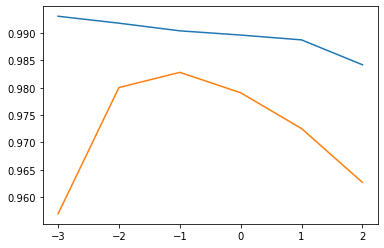

In [11]:
plt.plot(np.log10(alpha_list), train_scores)
plt.plot(np.log10(alpha_list), test_scores)
plt.show()

위 그래프의 왼쪽을 보면 훈련 셋과 테스트 셋의 점수 차이가 아주 크다. 훈련 셋에는 잘 맞고 테스트 셋에는 형편없는 과대적합의 전형적인 모습이다.

반대로 오른쪽 편은 훈련 셋과 테스트 셋의 점수가 모두 낮아지는 과소적합으로 가는 모습을 보인다.

적절한 alpha 값은 두 그래프가 가장 가깝고 테스트 셋의 점수가 가장 높은 -1, 즉 $10^{−1} = 0.1$ 이다. alpha 값을 0.1 로 하여 최종 모델을 훈련하겠다.

In [12]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386926


이 모델은 훈련 셋과 테스트 셋의 점수가 비슷하게 모두 높고 과대적합과 과소적합 사이에서 균형을 맞추고 있다. 

## 라쏘 회귀(Lasso Regression)

In [13]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


테스트 셋의 점수도 릿지만큼 아주 좋다. 라쏘 모델도 alpha 매개변수로 규제의 강도를 조절할 수 있다.

In [14]:
train_scores = []
test_scores = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    # 라쏘 모델을 만든다. (반복 횟수를 충분히 늘리기 위해 max_iter 사용)
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련한다.
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장한다.
    train_scores.append(lasso.score(train_scaled, train_target))
    test_scores.append(lasso.score(test_scaled, test_target))

/Users/eecs/opt/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/Users/eecs/opt/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


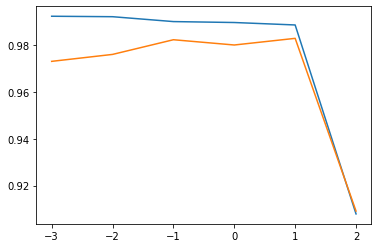

In [15]:
plt.plot(np.log10(alpha_list), train_scores)
plt.plot(np.log10(alpha_list), test_scores)
plt.show()

이 그래프도 왼쪽은 과대적합을 보여주고 있고, 오른쪽으로 갈수록 훈련 셋과 테스트 셋의 점수가 좁혀지고 있다. 

가장 오른쪽은 아주 크게 점수가 떨어진다. 이 지점은 분명 과소적합되는 모델일 것이다. 

라쏘 모델에서 최적의 alpha 값은 1, 즉 $10^1 = 10$ 이다. 이 값으로 다시 모델을 훈련하자.

In [16]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


모델이 잘 훈련된 것 같다. 특성을 많이 사용했지만, 릿지와 마찬가지로 라쏘 모델이 과대적합을 잘 억제하고 테스트 셋의 성능을 크게 높였다.